<a href="https://colab.research.google.com/github/adipurnamk/Belajar-Pengembangan-Machine-Learning/blob/master/Transfer_Learning_ResNet152V2_in_Chessman_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
-O /tmp/Chessman-image-dataset.zip

--2020-09-15 13:30:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  21.8MB/s    in 2.7s    

2020-09-15 13:30:31 (21.8 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [4]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 3s 0us/step


In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)


Epoch 1/50
63/63 - 123s - loss: 9.6522 - accuracy: 0.4168 - val_loss: 3.4648 - val_accuracy: 0.5769
Epoch 2/50
63/63 - 119s - loss: 1.8234 - accuracy: 0.6854 - val_loss: 1.5350 - val_accuracy: 0.7308
Epoch 3/50
63/63 - 120s - loss: 1.1642 - accuracy: 0.7295 - val_loss: 1.6018 - val_accuracy: 0.6346
Epoch 4/50
63/63 - 120s - loss: 0.9689 - accuracy: 0.7936 - val_loss: 0.9712 - val_accuracy: 0.7692
Epoch 5/50
63/63 - 120s - loss: 0.5623 - accuracy: 0.8216 - val_loss: 1.0144 - val_accuracy: 0.7500
Epoch 6/50
63/63 - 120s - loss: 0.4936 - accuracy: 0.8758 - val_loss: 1.2129 - val_accuracy: 0.7115
Epoch 7/50
63/63 - 119s - loss: 0.5651 - accuracy: 0.8517 - val_loss: 2.0629 - val_accuracy: 0.7692
Epoch 8/50
63/63 - 118s - loss: 0.7153 - accuracy: 0.8397 - val_loss: 1.2273 - val_accuracy: 0.7115
Epoch 9/50
63/63 - 119s - loss: 0.6115 - accuracy: 0.8657 - val_loss: 1.2934 - val_accuracy: 0.6731
Epoch 10/50
63/63 - 120s - loss: 0.4949 - accuracy: 0.8958 - val_loss: 0.8172 - val_accuracy: 0.7885

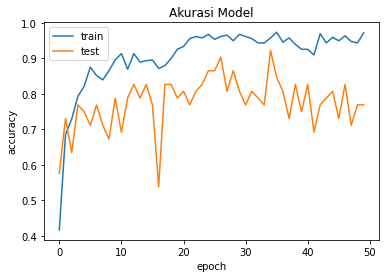

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

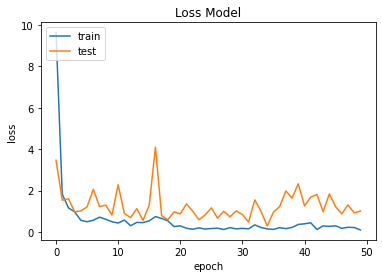

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()